In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
import random
from PIL import Image
import cv2

import keras.backend as K
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

from os import listdir
from os.path import isfile, join

import keras
from keras import metrics
from sklearn.metrics import mean_squared_error

In [2]:
def load_photos(directory):
    '''
    Loads the photo from the directory and return arrays of images and labels
    '''
    images = []
    directions = []
    vitesses = []
    dir_list = listdir(directory)
    random.shuffle(dir_list)
    for name in dir_list:
        filename = directory + '/' + name
        image = load_img(filename, target_size=(120, 160))
        # est ce nécessaire de resize ?
        image = img_to_array(image)
        images.append(image)
        direction = float((name.split('_')[2]).split('.jpg')[0])
        directions.append(direction)
        vitesse = float(name.split('_')[1])
        vitesses.append(vitesse)
    return images, directions, vitesses

In [3]:
X, Y, Z = load_photos("../data/images_data/images/circuits/entrainement")
print('Images chargées pour entraînement :',len(X))

Images chargées pour entraînement : 6074


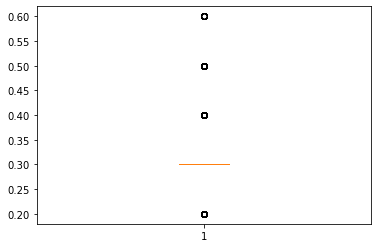

In [4]:
plt.boxplot(Z)
plt.show()

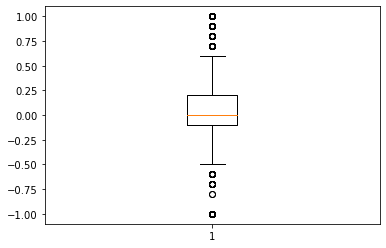

In [5]:
plt.boxplot(Y)
plt.show()

In [6]:
df = pd.DataFrame({'angle' : Y, 'vitesse' : Z})

In [7]:
df

,angle,vitesse
0,0.0,0.3
1,0.0,0.3
2,0.1,0.3
3,-0.2,0.3
4,-0.2,0.3
...,...,...
6069,-1.0,0.2
6070,0.0,0.3
6071,0.1,0.3
6072,0.0,0.3


In [8]:
bins = [-1, -0.5, -0.1, 0.1, 0.5, 1]
df['categorie_angle'] = pd.cut(df['angle'], bins)
df.head()

,angle,vitesse,categorie_angle
0,0.0,0.3,"(-0.1, 0.1]"
1,0.0,0.3,"(-0.1, 0.1]"
2,0.1,0.3,"(-0.1, 0.1]"
3,-0.2,0.3,"(-0.5, -0.1]"
4,-0.2,0.3,"(-0.5, -0.1]"


In [9]:
bins = [0, 0.2,0.4, 0.6, 0.8 ,1]
df['categorie_vitesse'] = pd.cut(df['vitesse'], bins)
df.head()

,angle,vitesse,categorie_angle,categorie_vitesse
0,0.0,0.3,"(-0.1, 0.1]","(0.2, 0.4]"
1,0.0,0.3,"(-0.1, 0.1]","(0.2, 0.4]"
2,0.1,0.3,"(-0.1, 0.1]","(0.2, 0.4]"
3,-0.2,0.3,"(-0.5, -0.1]","(0.2, 0.4]"
4,-0.2,0.3,"(-0.5, -0.1]","(0.2, 0.4]"


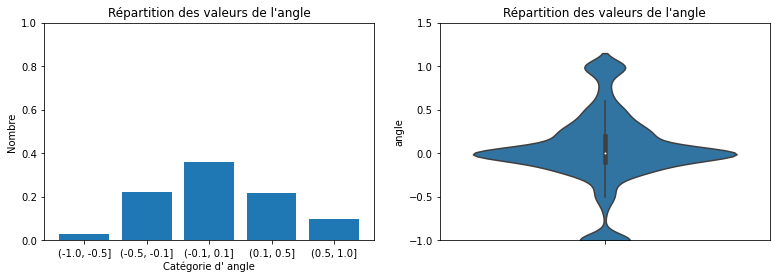

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(13,4))

ax1.bar([str(i) for i in df['categorie_angle'].value_counts().sort_index().index], df['categorie_angle'].value_counts().sort_index().apply(lambda x: x/len(df)))

ax1.set_xlabel("Catégorie d' angle")
ax1.set_ylabel("Nombre")
ax1.set_title("Répartition des valeurs de l'angle")
ax1.set_ylim(0,1)

sns.violinplot(y = "angle", data = df)
ax2.set_title("Répartition des valeurs de l'angle")
ax2.set_ylim(-1,1.5)
plt.show()

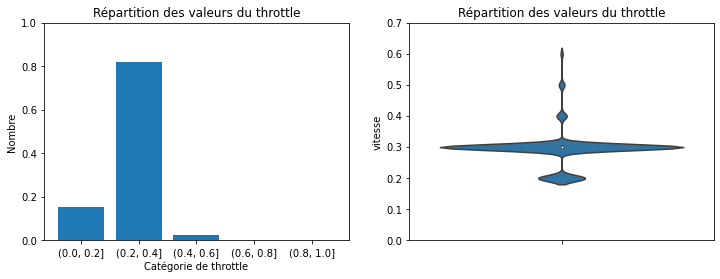

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

ax1.bar([str(i) for i in df["categorie_vitesse"].value_counts().sort_index().index], df["categorie_vitesse"].value_counts().sort_index().apply(lambda x: x/len(df)))
ax1.set_xlabel("Catégorie de throttle")
ax1.set_ylabel("Nombre")
ax1.set_title("Répartition des valeurs du throttle")
ax1.set_ylim(0,1)

sns.violinplot(y = "vitesse", data = df)
ax2.set_title("Répartition des valeurs du throttle")
ax2.set_ylim(0,0.7)
plt.show()

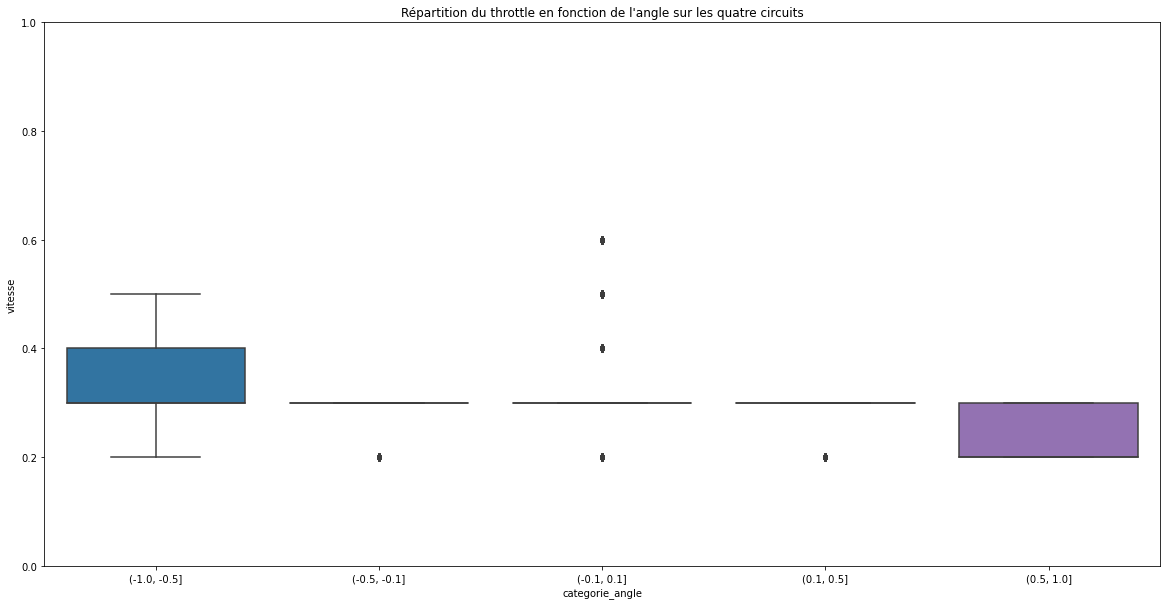

In [12]:
# à revoir problème au ni
fig, ax = plt.subplots(1,1, figsize = (20, 10))

sns.boxplot(x='categorie_angle', y = "vitesse", data=df, ax = ax)
ax.set_ylim(0,1)
ax.set_title("Répartition du throttle en fonction de l'angle sur les quatre circuits")

plt.show()